# P5 Segmentez des clients d'un site e-commerce

![alt text](DataBase_SQL.png "Title")



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
sns.set_theme(style="darkgrid")


# Importation

In [2]:
dataset_list = [
    'olist_order_reviews_dataset.csv.zip',
    'olist_customers_dataset.csv.zip',
    'olist_geolocation_dataset.csv.zip',
    'olist_order_items_dataset.csv.zip',
    'olist_order_payments_dataset.csv.zip'  ,
    'olist_orders_dataset.csv.zip',
    'olist_products_dataset.csv.zip',
    'olist_sellers_dataset.csv',
    'product_category_name_translation.csv'
]

data_name_list = [
    'order_reviews',
    'customers',
    'geolocalisation',
    'order_items',
    'order_payments',
    'orders',
    'products',
    'sellers',
    'translation'
]

data =   {key : pd.read_csv(path) for key,path in zip(data_name_list, dataset_list)}


In [3]:
data['products']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [4]:
data['sellers']

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
# res = [] 
# for name,dataset  in tmp:
#     res.append()

# Exploration

In [5]:
data['order_reviews']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [6]:
data['order_reviews']['review_comment_message'].isna().mean()

0.5870253164556962

## Clients
    on a un client unique par ligne dans le dataframe customers

In [7]:
# Nb de clients uniques == Nb de lignes ? , Combien ?
data['customers']['customer_id'].nunique() ==  data['customers'].shape[0] , data['customers']['customer_id'].nunique()

(True, 99441)

In [8]:
# Pourcentage de clients par ville, Sao Paulo en tête suivit de Rio de Janeiro
data['customers']['customer_city'].value_counts(normalize=True)

sao paulo            0.156274
rio de janeiro       0.069207
belo horizonte       0.027886
brasilia             0.021430
curitiba             0.015296
                       ...   
bequimao             0.000010
andarai              0.000010
vargem grande        0.000010
curvelandia          0.000010
eugenio de castro    0.000010
Name: customer_city, Length: 4119, dtype: float64

#### Mais un client peut avoir plusieurs commandes dans le dataframe *orders*

In [9]:
data['orders']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


# Order items 
    Nous donne ID des produits, le prix , freight_value == frais de transport/perte transport

In [10]:
print(data['order_items'].columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


In [11]:
data['order_items'].describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


# Order Payments

In [12]:
data['order_payments']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


# Jointure

    Dans un premier temps
    
    On laisse de cotès les tables 
    - reviews : commentaires (en portugais brésilien), 58 % de NA 
    - sellers : les vendeurs, on a déjà la catégories des biens, à voir dans un second temps la pertience de cette table 
    - geolocalisation : on déjà les villes des clients, surplus d'information ?
    
    On sélectionne ainsi : 
    - orders : date de livraison, date d'achat
    - payments : type de paiement, valeurs
    - customers : ID client, localisation
    - items : prix, valeur de fret/transport
    - Products : catégorie, dimension(poids, largeur, longeur...) 
    

In [13]:
# On a order_id pour orders, order_payments,order_items
data['orders'].columns, data['order_payments'].columns, data['order_items'].columns

(Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date'],
       dtype='object'),
 Index(['order_id', 'payment_sequential', 'payment_type',
        'payment_installments', 'payment_value'],
       dtype='object'),
 Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
        'shipping_limit_date', 'price', 'freight_value'],
       dtype='object'))

In [14]:
# jointure entre orders,order_payments et order_items par clé primaire : order_id
df_orders = (
    data['orders'].merge(
    data['order_payments'].merge(data['order_items'])
)
)
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,credit_card,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,credit_card,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [15]:
# jointure entre df_orders et les tables products et customers
df = data['products'].merge(df_orders.merge(data['customers']))
df.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [16]:
df['product_photos_qty'].value_counts() # Nombre de photos par produits ?

1.0     58539
2.0     22896
3.0     12920
4.0      8830
5.0      5585
6.0      3935
7.0      1556
8.0       772
10.0      353
9.0       318
11.0       73
12.0       60
13.0       30
15.0       12
17.0       11
14.0        6
18.0        4
19.0        2
20.0        1
Name: product_photos_qty, dtype: int64

# Méthode RFM
    - Récence : moins d’un mois, entre 1 et 5 mois, entre 5 et 10 mois, plus de 10 mois…
    - Fréquence : moins de 2 achats, entre 2 et 5 achats, plus de 5 achats…
    - Montant : moins de 20 euros, de 20 à 50 euros, de 50 à 100 euros, plus de 100 euros…

## Récence ?

In [17]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp']).astype('datetime64[D]')
df['order_purchase_timestamp']

0        2018-04-24
1        2018-01-31
2        2018-07-09
3        2018-08-03
4        2018-04-11
            ...    
117596   2018-01-03
117597   2018-03-06
117598   2018-03-06
117599   2018-03-06
117600   2018-06-28
Name: order_purchase_timestamp, Length: 117601, dtype: datetime64[ns]

In [18]:
pd.datetime.now() - df['order_purchase_timestamp']

C:\Users\Hankour\AppData\Local\Temp\ipykernel_21588\3078706742.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.now() - df['order_purchase_timestamp']


0        1821 days 10:48:44.055863
1        1904 days 10:48:44.055863
2        1745 days 10:48:44.055863
3        1720 days 10:48:44.055863
4        1834 days 10:48:44.055863
                    ...           
117596   1932 days 10:48:44.055863
117597   1870 days 10:48:44.055863
117598   1870 days 10:48:44.055863
117599   1870 days 10:48:44.055863
117600   1756 days 10:48:44.055863
Name: order_purchase_timestamp, Length: 117601, dtype: timedelta64[ns]

In [19]:
(pd.datetime.now() - df['order_purchase_timestamp']).astype('timedelta64[D]')

C:\Users\Hankour\AppData\Local\Temp\ipykernel_21588\1620719562.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (pd.datetime.now() - df['order_purchase_timestamp']).astype('timedelta64[D]')


0         1821.0
1         1904.0
2         1745.0
3         1720.0
4         1834.0
           ...  
117596    1932.0
117597    1870.0
117598    1870.0
117599    1870.0
117600    1756.0
Name: order_purchase_timestamp, Length: 117601, dtype: float64

#### Nombre de jours entre aujourd'hui et le dernier achat

In [20]:
df['nb_days'] = (datetime.now() - df['order_purchase_timestamp']).astype('timedelta64[D]')

In [21]:
df['nb_days']

0         1821.0
1         1904.0
2         1745.0
3         1720.0
4         1834.0
           ...  
117596    1932.0
117597    1870.0
117598    1870.0
117599    1870.0
117600    1756.0
Name: nb_days, Length: 117601, dtype: float64

In [76]:
df[['customer_unique_id','order_purchase_timestamp']]

,customer_unique_id,order_purchase_timestamp
0,b1a1199364a4a7fe27c4486ab63f550d,2018-04-24 16:16:53
1,4b86049cb99e4aa774031daa9cd18f18,2018-01-31 18:55:36
2,f63805d9c7edb84d92413af34b86a39c,2018-07-09 21:18:01
3,619e926d09b26efbd5180368b1ddc874,2018-08-03 08:55:50
4,ad353b4fb0e294adc4eda48af73e68a6,2018-04-11 01:06:37
...,...,...
117596,4d1bbadcfd9bdc738e54599627870319,2018-01-03 15:05:53
117597,2cc893f1618b7317170ba2456cf76117,2018-03-06 11:51:44
117598,2cc893f1618b7317170ba2456cf76117,2018-03-06 11:51:44
117599,2cc893f1618b7317170ba2456cf76117,2018-03-06 11:51:44


In [31]:
rfm = df.groupby('customer_unique_id').agg({'nb_days' : np.min, 
                                      'order_purchase_timestamp' : len,
                                      'payment_value' : np.sum
                                     }).reset_index()

rfm = rfm.rename(columns={'nb_days' : 'r', # récence
            'order_purchase_timestamp' : 'f', # fréquence
            'payment_value' : 'm' }) # montant
rfm

,customer_unique_id,r,f,m
0,0000366f3b9a7992bf8c76cfdf3221e2,1805.0,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1808.0,1,27.19
2,0000f46a3911fa3c0805444483337064,2231.0,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2015.0,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,1982.0,1,196.89
...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,2141.0,2,4134.84
95415,fffea47cd6d3cc0a88bd621562a9d061,1956.0,1,84.58
95416,ffff371b4d645b6ecea244b27531430a,2262.0,1,112.46
95417,ffff5962728ec6157033ef9805bacc48,1813.0,1,133.69


#### 85 % des clients consomment un seul bien

In [23]:
rfm.f.value_counts(normalize=True)

1     0.849810
2     0.111634
3     0.020342
4     0.009537
5     0.003280
6     0.002934
7     0.000755
8     0.000419
12    0.000252
10    0.000210
9     0.000210
11    0.000199
14    0.000073
13    0.000063
15    0.000052
20    0.000042
24    0.000042
16    0.000031
21    0.000031
18    0.000010
19    0.000010
22    0.000010
26    0.000010
38    0.000010
29    0.000010
75    0.000010
35    0.000010
Name: f, dtype: float64

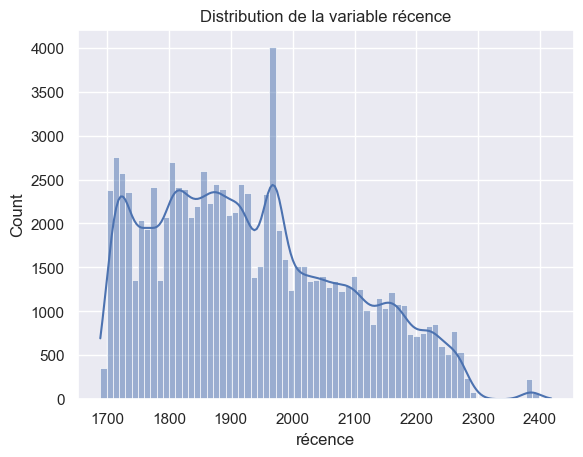

In [38]:
sns.histplot(data = rfm, x = "r" , kde=True)
plt.title('Distribution de la variable récence')
plt.xlabel('récence')
plt.show()

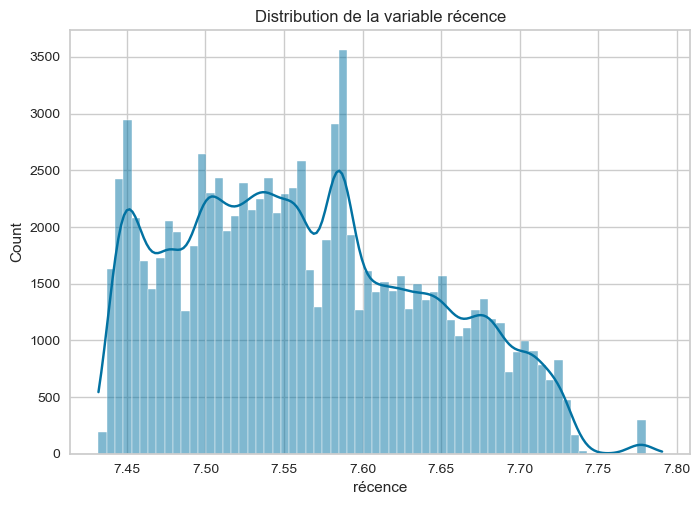

In [136]:
sns.histplot(data = rfm, x = "log_r" , kde=True)
plt.title('Distribution de la variable récence')
plt.xlabel('récence')
plt.show()

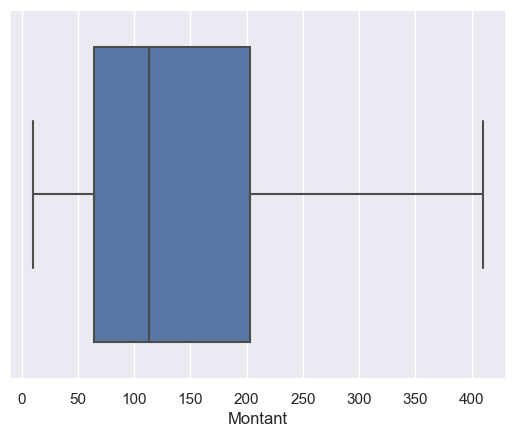

In [39]:
sns.boxplot(data= rfm, x='m', showfliers = False)
plt.title('')
plt.xlabel('Montant')
plt.show()

In [109]:
rfm.describe()

,r,f,m
count,95419.000000,95419.000000,95419.000000
mean,1925.496484,1.232469,212.831142
std,153.153950,0.823064,641.763082
min,1682.000000,1.000000,9.590000
25%,1801.000000,1.000000,63.910000
50%,1906.000000,1.000000,113.150000
75%,2035.000000,1.000000,202.545000
max,2411.000000,75.000000,109312.640000


In [40]:
# Score par quantile
rfm['rq'] = pd.cut(rfm.r,bins=np.quantile(rfm.r, q = [0,0.33,0.66,1]),labels=['2','1','0']).astype('str')

rfm['fq'] = pd.cut(rfm.f, bins= [0,1,2,100], labels=['0','1','2']).astype('str')

rfm['mq'] = pd.cut(rfm.m,bins=np.quantile(rfm.m, q = [0,0.33,0.66,1]),labels=['0','1','2']).astype('str')


# Score composite
rfm['score'] = rfm['rq'] + rfm['fq'] + rfm['mq']

rfm

,customer_unique_id,r,f,m,rq,fq,mq,score
0,0000366f3b9a7992bf8c76cfdf3221e2,1805.0,1,141.90,2,0,1,201
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1808.0,1,27.19,2,0,0,200
2,0000f46a3911fa3c0805444483337064,2231.0,1,86.22,0,0,1,001
3,0000f6ccb0745a6a4b88665a16c9f078,2015.0,1,43.62,0,0,0,000
4,0004aac84e0df4da2b147fca70cf8255,1982.0,1,196.89,0,0,2,002
...,...,...,...,...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,2141.0,2,4134.84,0,1,2,012
95415,fffea47cd6d3cc0a88bd621562a9d061,1956.0,1,84.58,1,0,1,101
95416,ffff371b4d645b6ecea244b27531430a,2262.0,1,112.46,0,0,1,001
95417,ffff5962728ec6157033ef9805bacc48,1813.0,1,133.69,2,0,1,201


In [41]:
rfm.score.value_counts()

000      10381
100      10190
200       9795
201       9789
001       9755
101       9377
202       7391
002       7264
102       7146
112       2513
212       2490
012       2456
222       1099
122       1039
022       1037
011        878
211        722
111        696
010        355
110        280
210        260
021        124
020         90
121         78
120         75
221         75
220         62
21nan        1
nan12        1
Name: score, dtype: int64

In [42]:
rfm.score.nunique()

29

In [157]:
rfm.isna().mean()

customer_unique_id    0.0
r                     0.0
f                     0.0
m                     0.0
rq                    0.0
fq                    0.0
mq                    0.0
score                 0.0
log_r                 0.0
log_f                 0.0
log_m                 0.0
dtype: float64

## Passage en log 
    transformer les variables en log pour avoir une distribution moins étirée

In [48]:
rfm.log_f.describe()

count    95419.000000
mean         0.129092
std          0.332981
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.317488
Name: log_f, dtype: float64

In [46]:
rfm['log_r'] = np.log(rfm.r)
rfm['log_f'] = np.log(rfm.f)
rfm['log_m'] = np.log(rfm.m)

rfm

,customer_unique_id,r,f,m,rq,fq,mq,score,log_r,log_f,log_m
0,0000366f3b9a7992bf8c76cfdf3221e2,1805.0,1,141.90,2,0,1,201,7.498316,0.000000,4.955123
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1808.0,1,27.19,2,0,0,200,7.499977,0.000000,3.302849
2,0000f46a3911fa3c0805444483337064,2231.0,1,86.22,0,0,1,001,7.710205,0.000000,4.456902
3,0000f6ccb0745a6a4b88665a16c9f078,2015.0,1,43.62,0,0,0,000,7.608374,0.000000,3.775516
4,0004aac84e0df4da2b147fca70cf8255,1982.0,1,196.89,0,0,2,002,7.591862,0.000000,5.282645
...,...,...,...,...,...,...,...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,2141.0,2,4134.84,0,1,2,012,7.669028,0.693147,8.327204
95415,fffea47cd6d3cc0a88bd621562a9d061,1956.0,1,84.58,1,0,1,101,7.578657,0.000000,4.437698
95416,ffff371b4d645b6ecea244b27531430a,2262.0,1,112.46,0,0,1,001,7.724005,0.000000,4.722598
95417,ffff5962728ec6157033ef9805bacc48,1813.0,1,133.69,2,0,1,201,7.502738,0.000000,4.895524


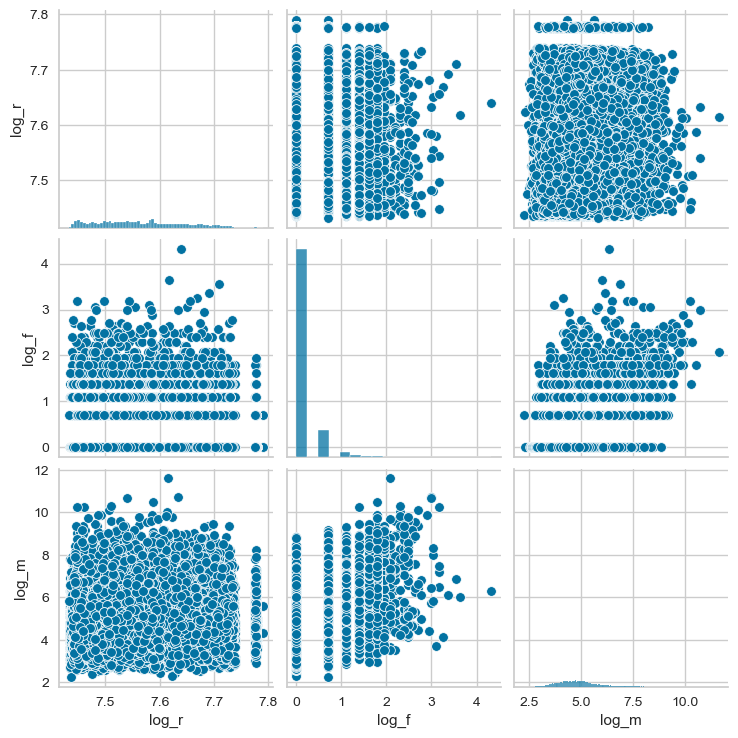

In [94]:
sns.pairplot(rfm[['log_r','log_f','log_m']])

## K means

In [135]:
# conda install -c conda-forge yellowbrick

In [51]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [142]:
X = np.array(rfm[['log_r','log_f','log_m']]) # On utilise la version log rfm

In [126]:
#X = np.array(rfm[['r','f','m']]) # normal

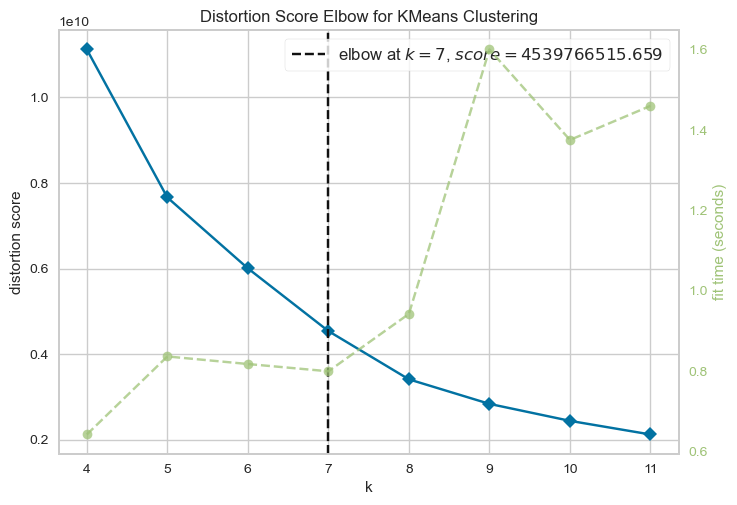

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [127]:

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

# A faire !

In [158]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2,15):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.49967515346613095)
For n_clusters = 3, silhouette score is 0.47895404215385873)
For n_clusters = 4, silhouette score is 0.4252852546768759)
For n_clusters = 5, silhouette score is 0.4179097045945509)
For n_clusters = 6, silhouette score is 0.45076549500777285)
For n_clusters = 7, silhouette score is 0.43489765684856546)
For n_clusters = 8, silhouette score is 0.4592468630239034)
For n_clusters = 9, silhouette score is 0.44430700086311364)
For n_clusters = 10, silhouette score is 0.45260688008748023)
For n_clusters = 11, silhouette score is 0.4342800449157854)
For n_clusters = 12, silhouette score is 0.4378745808755843)
For n_clusters = 13, silhouette score is 0.42676910333694085)
For n_clusters = 14, silhouette score is 0.4211240593026337)


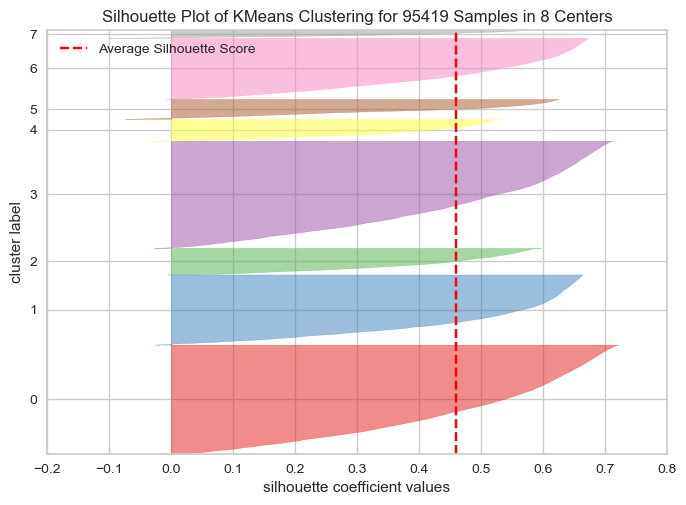

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 95419 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [58]:
model = KMeans(8)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

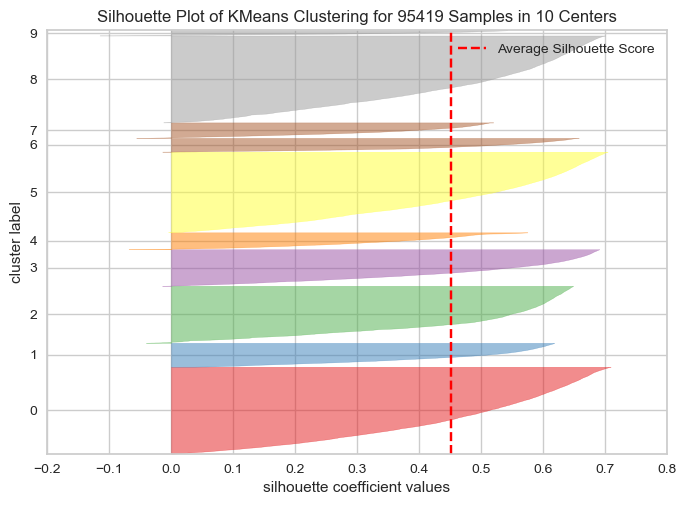

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 95419 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [57]:
model = KMeans(10)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [119]:
rfm.describe()

,r,f,m,log_r,log_f,log_m
count,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000
mean,1932.496484,1.232469,212.831142,7.563480,0.129092,4.802806
std,153.153950,0.823064,641.763082,0.078277,0.332981,0.916234
min,1689.000000,1.000000,9.590000,7.431892,0.000000,2.260721
25%,1808.000000,1.000000,63.910000,7.499977,0.000000,4.157476
50%,1913.000000,1.000000,113.150000,7.556428,0.000000,4.728714
75%,2042.000000,1.000000,202.545000,7.621685,0.000000,5.310962
max,2418.000000,75.000000,109312.640000,7.790696,4.317488,11.601967


In [99]:
model = KMeans(n_clusters = 7, random_state=2023).fit(X)
y_pred = model.predict(X)
# plt.scatter(X[:,0],X[:,1],c= y_pred)
# plt.show()

# ACP 

In [77]:
# X = rfm[['r','f','m']]
# X = np.array(X)

In [143]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [144]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.48309767 0.33337365]
0.816471326758454


In [145]:
model = KMeans(n_clusters = 7, random_state=2023).fit(X)
y_pred = model.predict(X)

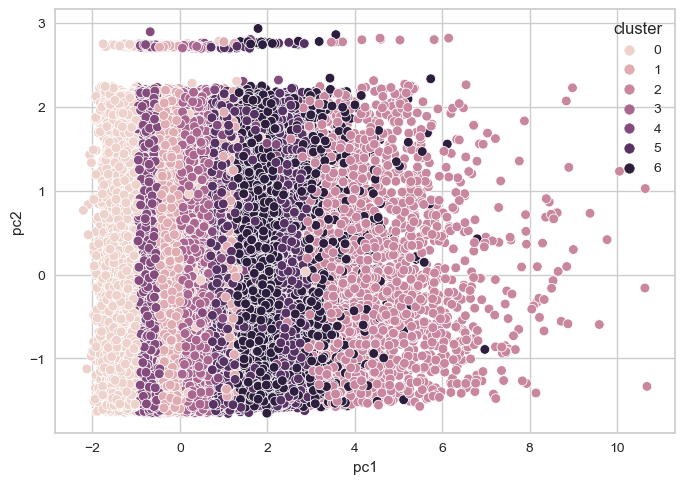

In [146]:
tmp = pd.DataFrame(pca.transform(X_scaled))
tmp.columns = ['pc1','pc2']
tmp['cluster'] = y_pred
sns.scatterplot(data=tmp, x='pc1',y='pc2',hue='cluster')
plt.show()

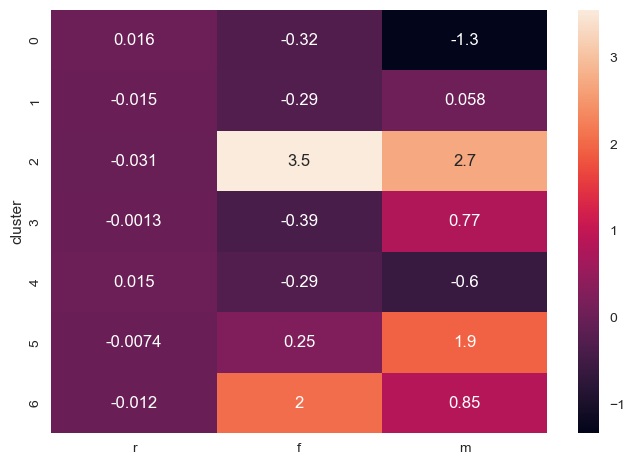

In [148]:

tmp = pd.DataFrame(X_scaled)
tmp.columns = ['r','f','m']
tmp['cluster'] = y_pred
tmp = tmp.groupby('cluster').mean()
sns.heatmap(tmp,annot=True)
plt.show()

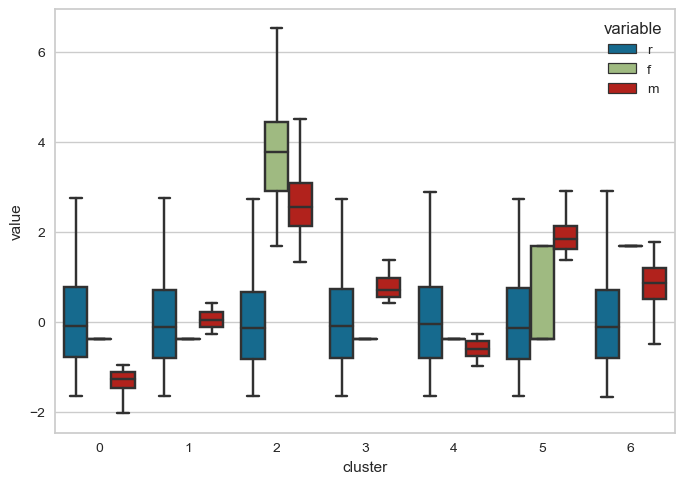

In [149]:

tmp = pd.DataFrame(X_scaled)
tmp.columns = ['r','f','m']
tmp['cluster'] = y_pred
tmp2 = pd.melt(frame = tmp, id_vars='cluster')

sns.boxplot(data=tmp2, x='cluster',y='value',hue='variable',showfliers=False)
plt.show()


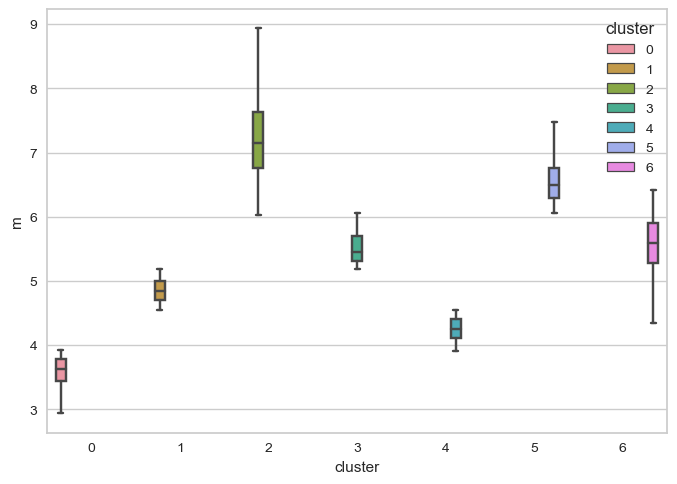

In [155]:
tmp = pd.DataFrame(X)
tmp.columns = ['r','f','m']
tmp['cluster'] = y_pred


sns.boxplot(data=tmp,
            x='cluster',
            y='m',
            hue='cluster',
            showfliers=False)
plt.show()


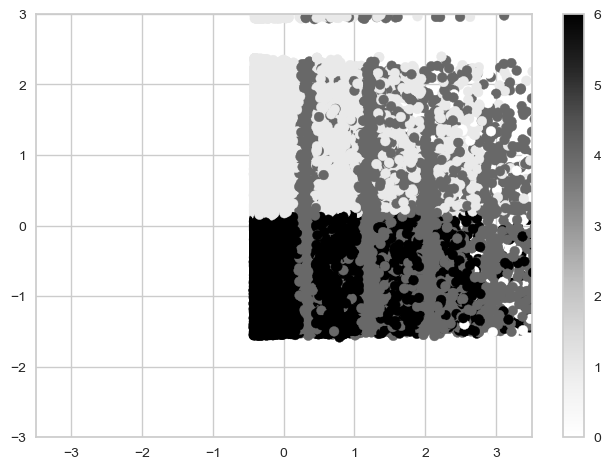

In [134]:
# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
            c=y_pred)

plt.xlim([-3.5, 3.5])
plt.ylim([-3, 3])
plt.colorbar()
plt.show()

# Dépôt de code / Brouillon 

# Fréquence 

In [73]:
df[['customer_unique_id','order_purchase_timestamp']]

,customer_unique_id,order_purchase_timestamp
0,b1a1199364a4a7fe27c4486ab63f550d,2018-04-24 16:16:53
1,4b86049cb99e4aa774031daa9cd18f18,2018-01-31 18:55:36
2,f63805d9c7edb84d92413af34b86a39c,2018-07-09 21:18:01
3,619e926d09b26efbd5180368b1ddc874,2018-08-03 08:55:50
4,ad353b4fb0e294adc4eda48af73e68a6,2018-04-11 01:06:37
...,...,...
117596,4d1bbadcfd9bdc738e54599627870319,2018-01-03 15:05:53
117597,2cc893f1618b7317170ba2456cf76117,2018-03-06 11:51:44
117598,2cc893f1618b7317170ba2456cf76117,2018-03-06 11:51:44
117599,2cc893f1618b7317170ba2456cf76117,2018-03-06 11:51:44


# Montant 

In [74]:
df[['customer_unique_id','payment_value']]

,customer_unique_id,payment_value
0,b1a1199364a4a7fe27c4486ab63f550d,18.30
1,4b86049cb99e4aa774031daa9cd18f18,265.99
2,f63805d9c7edb84d92413af34b86a39c,87.62
3,619e926d09b26efbd5180368b1ddc874,121.84
4,ad353b4fb0e294adc4eda48af73e68a6,46.19
...,...,...
117596,4d1bbadcfd9bdc738e54599627870319,92.02
117597,2cc893f1618b7317170ba2456cf76117,159.54
117598,2cc893f1618b7317170ba2456cf76117,159.54
117599,2cc893f1618b7317170ba2456cf76117,159.54


In [69]:
df['order_status'].value_counts(normalize=True)

delivered      0.978180
shipped        0.010578
canceled       0.004813
processing     0.003189
invoiced       0.003155
unavailable    0.000060
approved       0.000026
Name: order_status, dtype: float64

In [70]:
df[['customer_unique_id','customer_id']]

,customer_unique_id,customer_id
0,b1a1199364a4a7fe27c4486ab63f550d,f8a3e963a310aa58b60a5b1fed5bceb5
1,4b86049cb99e4aa774031daa9cd18f18,03fc97548af8f58fefc768d12b546c9c
2,f63805d9c7edb84d92413af34b86a39c,e41819d1c95c12c9ce495b630eab8aee
3,619e926d09b26efbd5180368b1ddc874,322162b5ca010c2b059cb5224dd818b1
4,ad353b4fb0e294adc4eda48af73e68a6,c11c31965ff02cc1d7132df8edfcbc22
...,...,...
117596,4d1bbadcfd9bdc738e54599627870319,e750210dde7e68dbd5194c0809e97f7e
117597,2cc893f1618b7317170ba2456cf76117,0f139d1b208a62a37671423e5eff5016
117598,2cc893f1618b7317170ba2456cf76117,0f139d1b208a62a37671423e5eff5016
117599,2cc893f1618b7317170ba2456cf76117,0f139d1b208a62a37671423e5eff5016


In [67]:
df[
    ['product_id',
       'order_id', 'customer_id', 'order_status', 
     
     'order_purchase_timestamp',
     
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
    ]
]

,product_id,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,1,debit_card,1,18.30,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,b1a1199364a4a7fe27c4486ab63f550d
1,3aa071139cb16b67ca9e5dea641aaa2f,5236307716393b7114b53ee991f36956,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22 00:00:00,1,voucher,1,265.99,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,4b86049cb99e4aa774031daa9cd18f18
2,96bd76ec8810374ed1b65e291975717f,01f66e58769f84129811d43eefd187fb,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18 00:00:00,1,credit_card,1,87.62,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,f63805d9c7edb84d92413af34b86a39c
3,cef67bcfe19066a932b7673e239eb23d,143d00a4f2dde4e0364ee1821577adb3,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08 00:00:00,1,credit_card,2,121.84,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,619e926d09b26efbd5180368b1ddc874
4,9dc1a7de274444849c219cff195d0b71,86cafb8794cb99a9b1b77fc8e48fbbbb,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26 00:00:00,1,credit_card,4,46.19,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,ad353b4fb0e294adc4eda48af73e68a6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,83808703fc0706a22e264b9d75f04a2e,59e88b7d3675e89aceaf86f372d3bc9a,e750210dde7e68dbd5194c0809e97f7e,delivered,2018-01-03 15:05:53,2018-01-04 05:14:57,2018-01-04 15:57:18,2018-01-15 20:39:35,2018-02-02 00:00:00,1,boleto,1,92.02,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,4d1bbadcfd9bdc738e54599627870319
117597,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,1,boleto,1,159.54,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,2cc893f1618b7317170ba2456cf76117
117598,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,1,boleto,1,159.54,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,2cc893f1618b7317170ba2456cf76117
117599,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,1,boleto,1,159.54,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,2cc893f1618b7317170ba2456cf76117


In [56]:
# olist_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv.zip')

# olist_order_custormer = pd.read_csv('olist_customers_dataset.csv.zip')

# olist_geolocation = pd.read_csv('olist_geolocation_dataset.csv.zip')

# olist_order_items = pd.read_csv('olist_order_items_dataset.csv.zip')

# olist_order_payments = pd.read_csv('olist_order_payments_dataset.csv.zip')

# olist_orders_dataset = pd.read_csv('olist_orders_dataset.csv.zip')

# olist_products_dataset = pd.read_csv('olist_products_dataset.csv.zip')

# olist_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')

# translation = pd.read_csv('product_category_name_translation.csv')

In [58]:
olist_order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [66]:
olist_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [61]:
olist_order_custormer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [62]:
olist_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [64]:
olist_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [68]:
olist_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [67]:
olist_order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [69]:
olist_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [70]:
olist_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [71]:
olist_products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [72]:
olist_sellers_dataset

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
